In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [5]:
rating_data=pd.read_csv("/home/b/Desktop/Tademy/Cohort_B/Week_0/Technical Content/archive/rating.csv")

In [4]:
rating_data.columns

Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'article', 'title_sentiment'],
      dtype='object')

### Data overview

In [4]:
rating_data.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral


In [5]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58356 entries, 0 to 58355
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_id       58356 non-null  int64 
 1   source_id        17771 non-null  object
 2   source_name      58356 non-null  object
 3   author           56193 non-null  object
 4   title            58356 non-null  object
 5   description      58346 non-null  object
 6   url              58356 non-null  object
 7   url_to_image     54905 non-null  object
 8   published_at     58356 non-null  object
 9   content          58356 non-null  object
 10  category         58335 non-null  object
 11  article          58356 non-null  object
 12  title_sentiment  58356 non-null  object
dtypes: int64(1), object(12)
memory usage: 5.8+ MB


### Checking for missing values

In [6]:
rating_data.isnull().sum()

article_id             0
source_id          40585
source_name            0
author              2163
title                  0
description           10
url                    0
url_to_image        3451
published_at           0
content                0
category              21
article                0
title_sentiment        0
dtype: int64

### Exploring Categories

In [7]:
rating_data['category'].unique()

array(['Monaco', 'Madagascar', 'Mexico', 'Maldives', 'Mali', 'Barbados',
       'Nicaragua', 'Congo, The Democratic Republic of the',
       'North Macedonia', 'Malta', 'Poland', 'Myanmar',
       'Russian Federation', 'Mongolia', 'Montenegro', 'Malaysia',
       'Romania', 'Mozambique', 'Montserrat', 'South Sudan', 'News',
       'Israel', 'Mauritania', 'Mauritius', 'Netherlands', 'Martinique',
       'Malawi', 'Germany', 'Niger', 'Namibia', 'Nigeria', 'Georgia',
       'Nepal', 'Facebook', 'Norway', 'COVID', 'Peru', 'Travel',
       'History', 'Papua New Guinea', 'New Zealand', 'Sports', 'Oman',
       'Pakistan', 'Panama', 'Love', 'America', 'Philippines', 'Palau',
       'Politics', 'Armenia', 'Food', 'Sudan', 'Puerto Rico', 'Weather',
       'Real estate', 'Cars', 'Senegal', 'Singapore', 'Stock', 'Ghana',
       'TikTok', 'Photography', 'Kazakhstan', 'Games', 'Climate', 'Space',
       'Somalia', 'Tonga', 'Architecture', 'Art', 'Africa',
       'Relationships', 'Qatar', 'world', '

In [8]:
rating_data['category'].value_counts()

category
Stock          3687
Canada         2066
Health         2046
Real estate    2030
Technology     1993
               ... 
Burundi           3
Cabo Verde        3
Honduras          3
Martinique        2
Réunion           2
Name: count, Length: 256, dtype: int64

### Exploring Text Columns

In [9]:
rating_data['title_length']=rating_data['title'].apply(lambda x:len(str(x)))
rating_data['content_length']=rating_data['content'].apply(lambda x:len(str(x)))

In [10]:
rating_data['title_length'].describe()

count    58356.000000
mean        76.767033
std         26.009651
min         12.000000
25%         60.000000
50%         73.000000
75%         89.000000
max        326.000000
Name: title_length, dtype: float64

In [11]:
rating_data['content_length'].describe()

count    58356.000000
mean       207.838920
std         28.566682
min         25.000000
25%        213.000000
50%        214.000000
75%        214.000000
max        216.000000
Name: content_length, dtype: float64

### Analyzing sentiments

In [12]:
rating_data['title_sentiment'].value_counts()

title_sentiment
Neutral     42926
Negative     9133
Positive     6297
Name: count, dtype: int64

### Visulaizations

In [13]:
#create a bar chart of sentiment counts

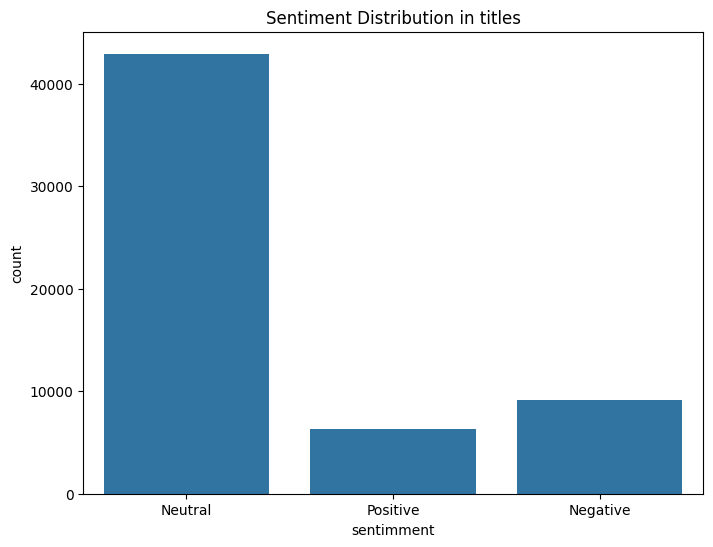

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(data=rating_data,x='title_sentiment')
plt.title('Sentiment Distribution in titles')
plt.xlabel('sentimment')
plt.ylabel('count')
plt.show()

#### Histogram of title lengths

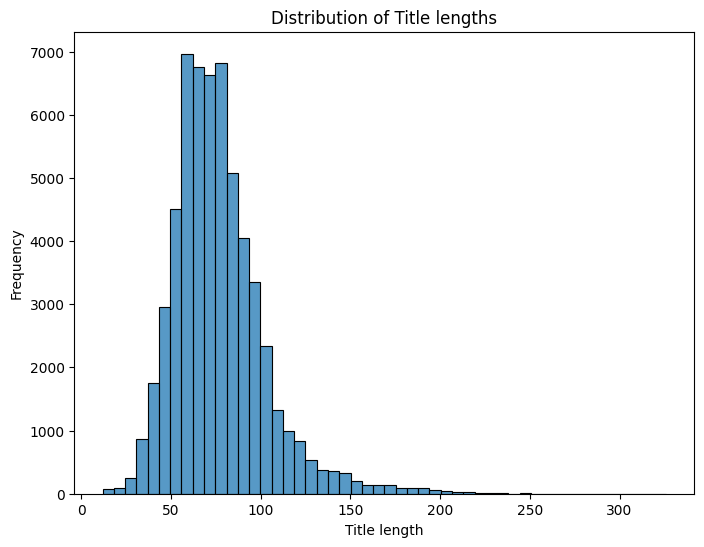

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(data=rating_data,x='title_length',bins=50)
plt.title('Distribution of Title lengths')
plt.xlabel('Title length')
plt.ylabel('Frequency')
plt.show()

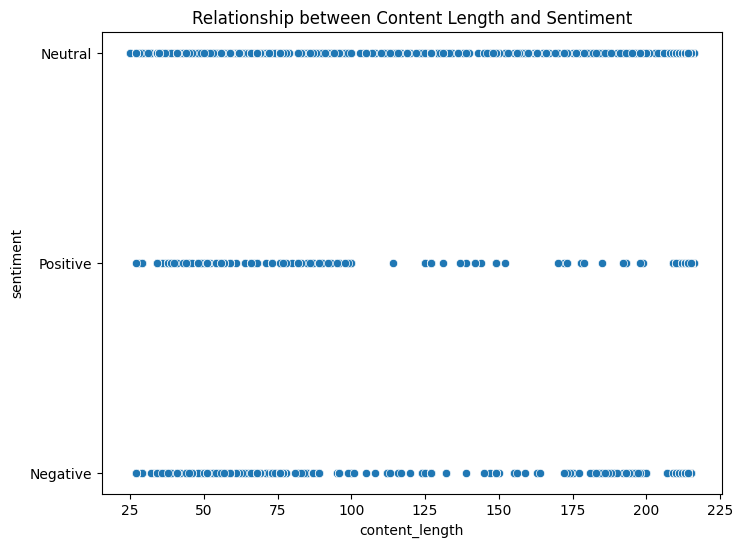

In [16]:
#create a scatter plot of content_length vs sentiment
plt.figure(figsize=(8,6))
sns.scatterplot(data=rating_data,x='content_length',y='title_sentiment')
plt.title('Relationship between Content Length and Sentiment')
plt.xlabel('content_length')
plt.ylabel('sentiment')
plt.show()

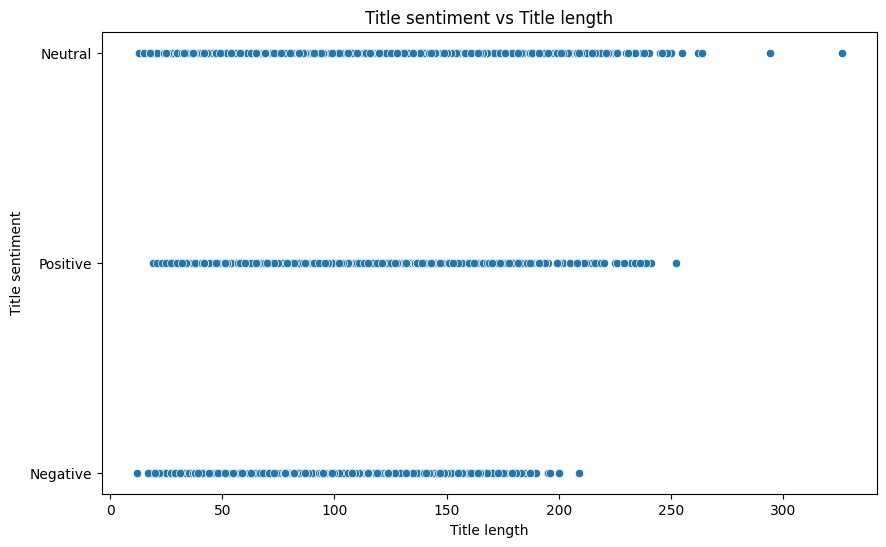

In [17]:
#create a scatter plot of the title_sentiment vs title_length
plt.figure(figsize=(10,6))
sns.scatterplot(data=rating_data,x='title_length',y='title_sentiment')
plt.title('Title sentiment vs Title length')
plt.xlabel('Title length')
plt.ylabel('Title sentiment')
plt.show()

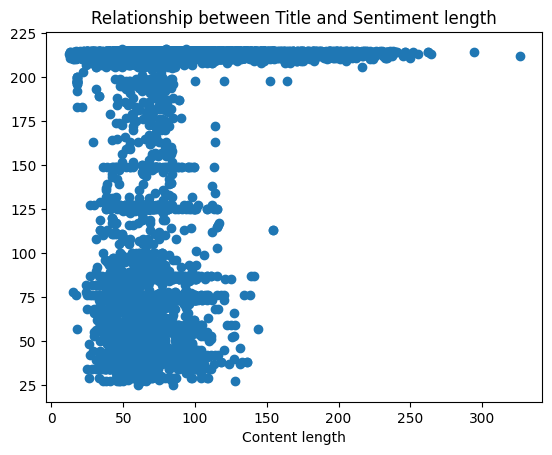

In [18]:
#plot a scatterplot of title length vs content length
plt.scatter(rating_data['title_length'],rating_data['content_length'])
plt.xlabel('Title length')
plt.xlabel('Content length')
plt.title('Relationship between Title and Sentiment length')
plt.show()

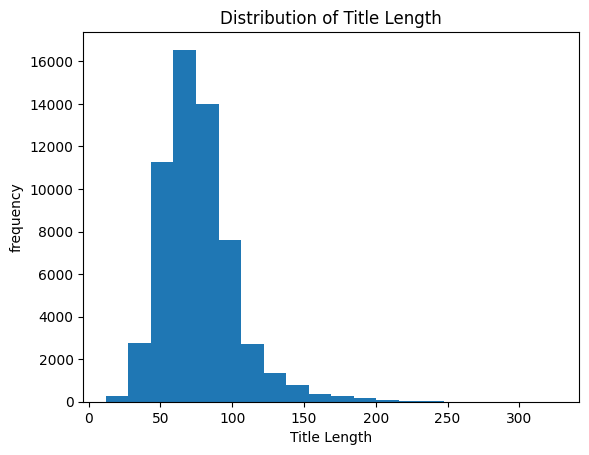

In [19]:
#create a histogram of title length
plt.hist(rating_data['title_length'],bins=20)
plt.xlabel('Title Length')
plt.ylabel('frequency')
plt.title('Distribution of Title Length')
plt.show()

### Websites with largest count of news article 

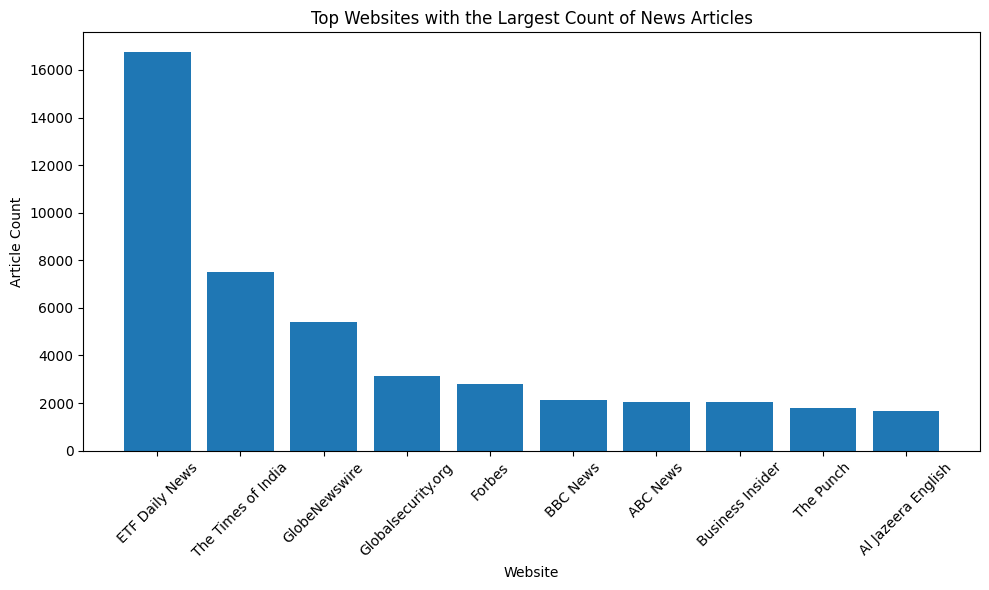

In [20]:
# calculating the top_websites based on the largest article count

#Group the data by the "source_name" column and calculate the count of articles for each source

website_counts = rating_data.groupby("source_name").size().reset_index(name="article_count")

#sort the dataframe by the article count column in descending order 

top_web = website_counts.sort_values(by="article_count", ascending=False).head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_web["source_name"], top_web["article_count"])
plt.xlabel("Website")
plt.ylabel("Article Count")
plt.title("Top Websites with the Largest Count of News Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

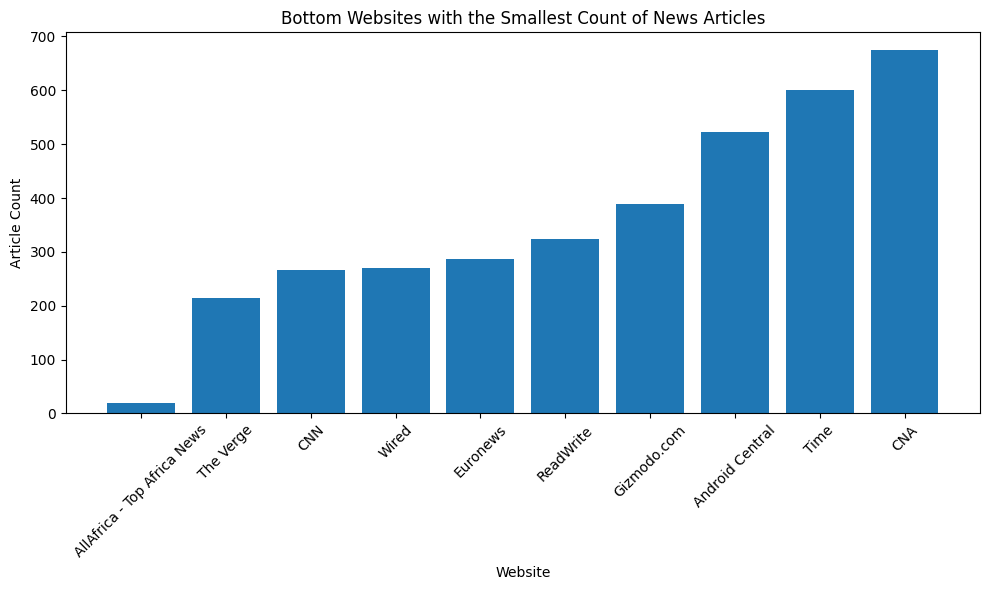

In [21]:
# Group the data by the "source_name" column and calculate the count of articles for each source
website_counts = rating_data.groupby("source_name").size().reset_index(name="article_count")

# Sort the resulting DataFrame by the "article_count" column in ascending order
bottom_websites = website_counts.sort_values(by="article_count", ascending=True).head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(bottom_websites["source_name"], bottom_websites["article_count"])
plt.xlabel("Website")
plt.ylabel("Article Count")
plt.title("Bottom Websites with the Smallest Count of News Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Websites with the highest number of traffic

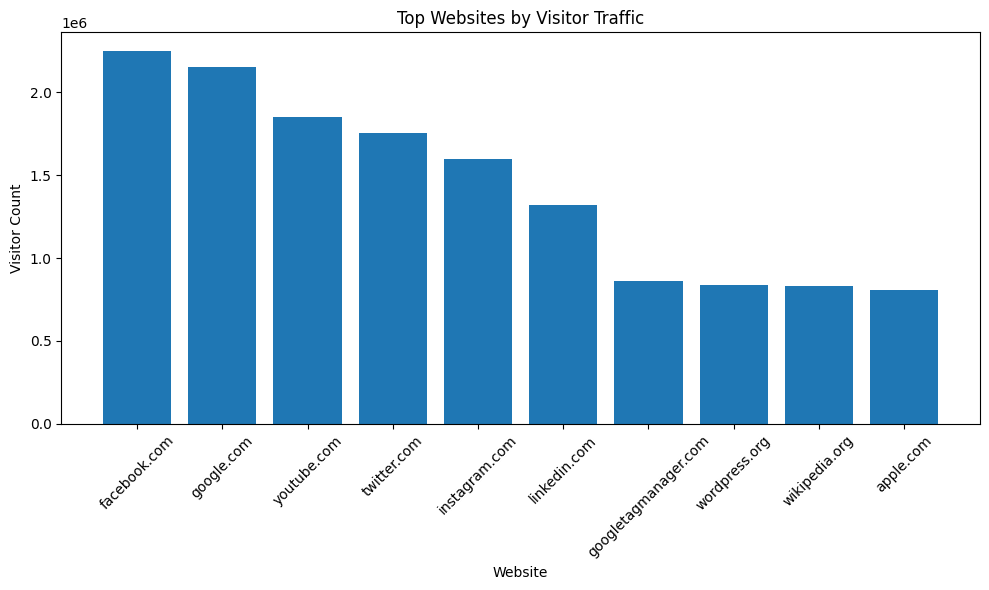

In [22]:
# Load the traffic data into a Pandas DataFrame (replace "traffic_data.csv" with the actual file path)
traffic_data = pd.read_csv("/home/b/Desktop/Tademy/Cohort_B/Week_0/Technical Content/archive/traffic_data/traffic.csv")

# Calculate the total number of unique visitors for each website
visitor_count = traffic_data.groupby("Domain")["RefIPs"].sum()

# Sort the websites based on the visitor count in descending order
sorted_websites = visitor_count.sort_values(ascending=False)

# Get the top N websites with the highest visitor count
top_websites = sorted_websites.head(10)

# Plotting the top websites
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Create a bar chart
plt.bar(top_websites.index, top_websites.values)

# Customize the plot
plt.xlabel("Website")
plt.ylabel("Visitor Count")
plt.title("Top Websites by Visitor Traffic")

# Rotate x-axis labels for better readability, if needed
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

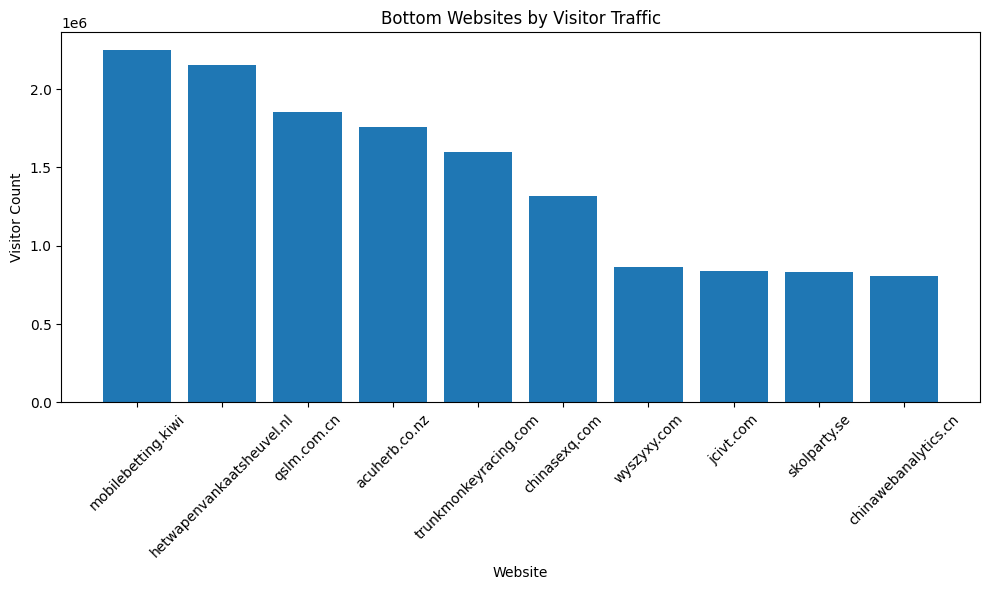

In [23]:
# Load the traffic data into a Pandas DataFrame (replace "traffic_data.csv" with the actual file path)
traffic_data = pd.read_csv("/home/b/Desktop/Tademy/Cohort_B/Week_0/Technical Content/archive/traffic_data/traffic.csv")

# Calculate the total number of unique visitors for each website
visitor_count = traffic_data.groupby("Domain")["RefIPs"].sum()

# Sort the websites based on the visitor count in descending order
sorted_websites = visitor_count.sort_values(ascending=True)

# Get the top N websites with the highest visitor count
bottom_web = sorted_websites.head(10)

# Plotting the bottom websites
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Create a bar chart
plt.bar(bottom_web.index, top_websites.values)

# Customize the plot
plt.xlabel("Website")
plt.ylabel("Visitor Count")
plt.title("Bottom Websites by Visitor Traffic")

# Rotate x-axis labels for better readability, if needed
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [24]:
traffic_data.isnull()

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,False,False
999996,False,False,False,False,False,False,False,False,False,False,False,False
999997,False,False,False,False,False,False,False,False,False,False,False,False
999998,False,False,False,False,False,False,False,False,False,False,False,False


### Countries with the highest number of news media organisations 

In [25]:
# Load the domain dataset
domain_data = pd.read_csv("/home/b/Desktop/Tademy/Cohort_B/Week_0/Technical Content/archive/domains_location.csv")

# Count the occurrences of each country code
country_counts = domain_data['location'].value_counts()

domain_data.columns

Index(['SourceCommonName', 'location', 'Country'], dtype='object')

In [26]:
domain_data.isnull()

,SourceCommonName,location,Country
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
37797,False,False,False
37798,False,False,False
37799,False,False,False
37800,False,False,False


In [27]:
# Print the top countries with the highest number of news media organizations
top_countries = country_counts.head(5)  # Change 5 to the desired number of top countries
print("Countries with the highest number of news media organizations:")
print(top_countries)
# Print the top countries with the highest number of news media organizations
top_countries = country_counts.head(5)  # Change 5 to the desired number of top countries
print("Countries with the highest number of news media organizations:")
print(top_countries)

Countries with the highest number of news media organizations:
location
US    14111
UK     1950
IT     1810
FR     1041
RS     1024
Name: count, dtype: int64
Countries with the highest number of news media organizations:
location
US    14111
UK     1950
IT     1810
FR     1041
RS     1024
Name: count, dtype: int64


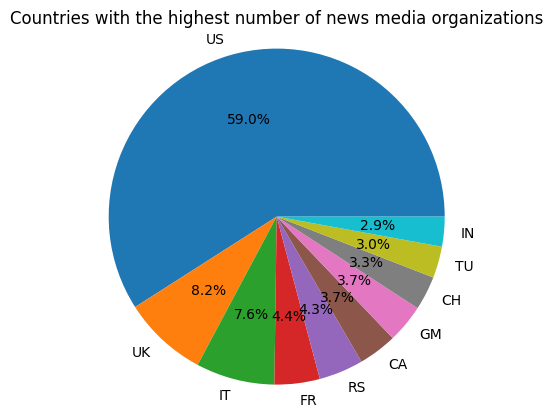

In [28]:
# Count the occurrences of each country code
country_counts = domain_data['location'].value_counts()

# Get the top countries with the highest number of news media organizations
top_countries = country_counts.head(10)  # Change 5 to the desired number of top countries

# Plotting the results in a pie chart
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%')
plt.title("Countries with the highest number of news media organizations")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### Countries that have many articles written about them 

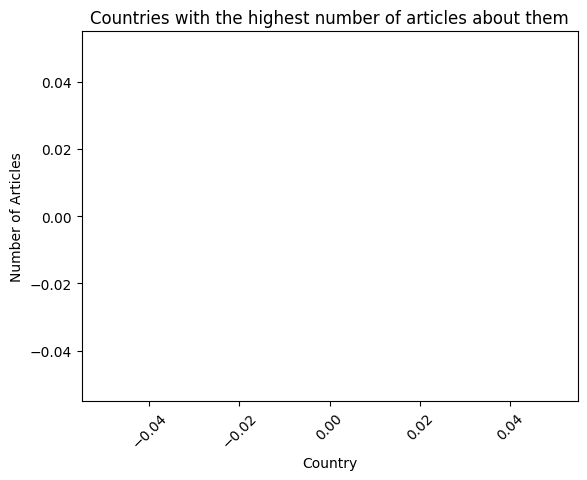

In [29]:
# Merge the datasets based on source name
merged_data = pd.merge(rating_data, domain_data, left_on="source_name", right_on="SourceCommonName", how="left")

# Group by country and count the number of articles
country_counts = merged_data.groupby("Country")["article_id"].count()

# Sort the countries based on the number of articles
sorted_countries = country_counts.sort_values(ascending=False)

# Get the top countries with the highest number of articles
top_countries = sorted_countries.head(5)  # Change 5 to the desired number of top countries

# Plotting the results in a bar chart
plt.bar(top_countries.index, top_countries)
plt.title("Countries with the highest number of articles about them")
plt.xlabel("Country")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

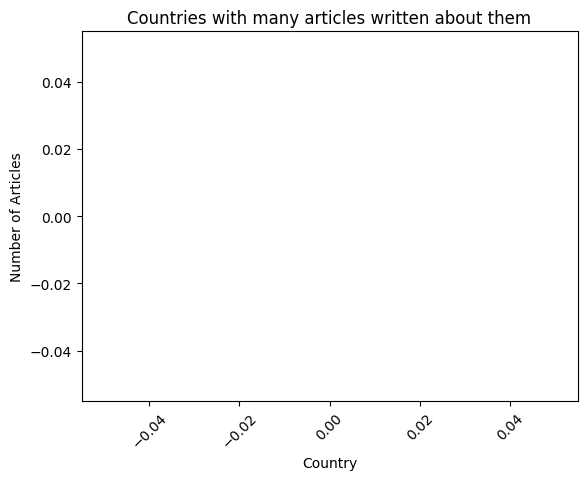

In [47]:
# Filter articles where the content is about a specific country
desired_country = "country_name"  # Replace "country_name" with the desired country name
content_country_articles = rating_data[rating_data["content"].str.contains(desired_country, case=False)]

# Merge the filtered articles with the domains location data based on source_id
merged_data = pd.merge(content_country_articles, domain_data, left_on="source_id", right_on="SourceCommonName")

# Count the number of articles for each country
country_counts = merged_data["Country"].value_counts()

# Get the names of the countries with the most articles
top_countries = country_counts.head(10)  # Change the number to display more or fewer countries

# Display the names of the top countries
for country in top_countries.index:
    print(country)

# Plot the results in a bar chart
plt.bar(country_counts.index, country_counts)
plt.title("Countries with many articles written about them")
plt.xlabel("Country")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

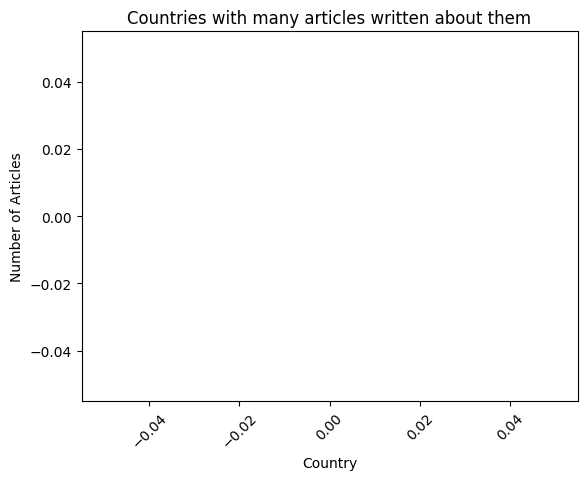

In [48]:
# Filter articles where the content is about a specific country
desired_country = "country_name"  # Replace "country_name" with the desired country name
content_country_articles = rating_data[rating_data["content"].str.contains(desired_country, case=False)]

# Merge the filtered articles with the domains location data based on source_id
merged_data = pd.merge(content_country_articles, domain_data, left_on="source_id", right_on="SourceCommonName")

# Count the number of articles for each country
country_counts = merged_data["Country"].value_counts()

# Get the top countries with the most articles
top_countries = country_counts.head(10)  # Change the number to display more or fewer countries

# Display the names of the top countries
for country in top_countries.index:
    print(country)

# Plot the results in a bar chart
plt.bar(country_counts.index, country_counts)
plt.title("Countries with many articles written about them")
plt.xlabel("Country")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

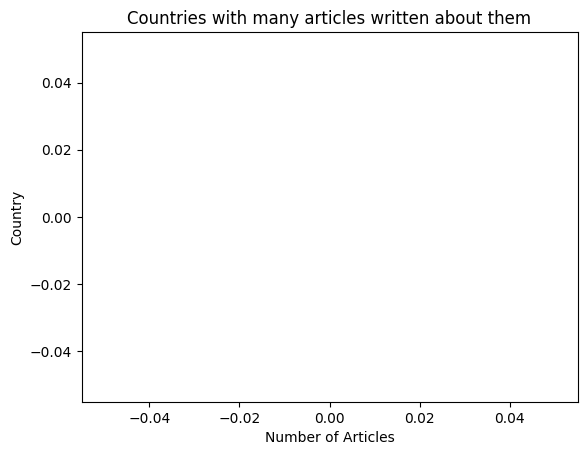

In [49]:
# Filter articles where the content is about a specific country
desired_country = "country_name"  # Replace "country_name" with the desired country name
content_country_articles = rating_data[rating_data["content"].str.contains(desired_country, case=False)]

# Merge the filtered articles with the domains location data based on source_id
merged_data = pd.merge(content_country_articles, domain_data, left_on="source_id", right_on="SourceCommonName")

# Count the number of articles for each country
country_counts = merged_data["Country"].value_counts()

# Get the top countries with the most articles
top_countries = country_counts.head(10)  # Change the number to display more or fewer countries

# Display the names of the top countries
for country in top_countries.index:
    print(country)

# Plot the results in a bar chart
plt.barh(country_counts.index, country_counts)  # Use barh for horizontal bar chart
plt.title("Countries with many articles written about them")
plt.xlabel("Number of Articles")  # Adjust the axis labels accordingly
plt.ylabel("Country")  # Adjust the axis labels accordingly
plt.show()

### Websites that reported (the news content) about Africa, US, China, EU, Russia, Ukraine, Middle east

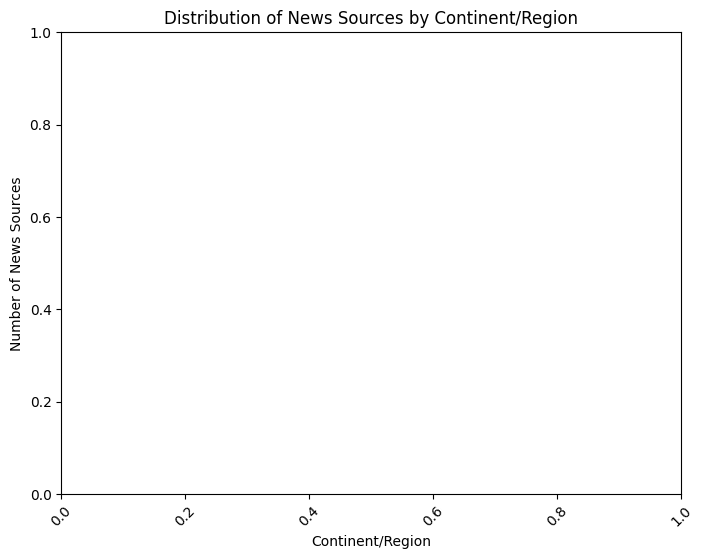

In [110]:
# Group countries into continents/regions
african_countries = ['Egypt', 'Nigeria', 'South Africa']  # Add more African countries as needed
eu_countries = ['Germany', 'France', 'Italy', 'Spain']  # Add more EU countries as needed
middle_east_countries = ['Saudi Arabia', 'United Arab Emirates', 'Iran']  # Add more Middle East countries as needed

# Create a new column to indicate the continent/region for each source
domain_data['Continent'] = 'Other'
domain_data.loc[domain_data['Country'].isin(african_countries), 'Continent'] = 'Africa'
domain_data.loc[domain_data['Country'].isin(eu_countries), 'Continent'] = 'EU'
domain_data.loc[domain_data['Country'].isin(middle_east_countries), 'Continent'] = 'Middle East'
# Join the rating data with the domain location data
merged_data = rating_data.merge(domain_data, left_on='source_name', right_on='SourceCommonName', how='left')

# Join the merged data with the traffic data
merged_data = merged_data.merge(traffic_data, left_on='source_name', right_on='Domain', how='left')
# Count the number of news sources in each continent/region
continent_counts = merged_data['Continent'].value_counts()

# Plot the distribution using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=continent_counts.index, y=continent_counts.values)
plt.title('Distribution of News Sources by Continent/Region')
plt.xlabel('Continent/Region')
plt.ylabel('Number of News Sources')
plt.xticks(rotation=45)
plt.show()

### 

In [67]:
# Check unique values in the 'title_sentiment' column
unique_sentiments = merged_data['title_sentiment'].unique()
print(unique_sentiments)

['Neutral' 'Positive' 'Negative']


In [78]:
domain_data.columns

Index(['SourceCommonName', 'location', 'Country', 'Continent'], dtype='object')

In [ ]:
Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'article', 'title_sentiment', 'title_length',
       'content_length'],
      dtype='object'
Index(['SourceCommonName', 'location', 'Country', 'Continent'], dtype='object')

Index(['GlobalRank', 'TldRank', 'Domain', 'TLD', 'RefSubNets', 'RefIPs',
       'IDN_Domain', 'IDN_TLD', 'PrevGlobalRank', 'PrevTldRank',
       'PrevRefSubNets', 'PrevRefIPs'],
      dtype='object')

In [122]:
# Check the number of rows in merged_data
print("Number of rows in merged_data:", len(merged_data))

# Check the unique values in the 'source_name' column
print("Unique source names:", merged_data['source_name'].unique())

# Check if there are any missing values in the 'content_length' column
print("Missing values in content_length:", merged_data['content_length'].isnull().sum())

# Check if there are any missing values in the 'title_word_count' column
print("Missing values in title_word_count:", merged_data['title_word_count'].isnull().sum())


Number of rows in merged_data: 0
Unique source names: []
Missing values in content_length: 0
Missing values in title_word_count: 0


In [123]:
print("Rating Data:")
print(rating_data.head())

print("\nDomain Data:")
print(domain_data.head())

print("\nTraffic Data:")
print(traffic_data.head())


Rating Data:
   article_id source_id     source_name  \
0       81664       NaN          Forbes   
1       81667       NaN             CNA   
2       81694      time            Time   
3       81695       NaN        Phys.Org   
4       81703       NaN  Digital Trends   

                                              author  \
0  Elizabeth Brownfield, Contributor, \n Elizabet...   
1                                                NaN   
2                              Christina Larson / AP   
3                                       Sara Schmidt   
4                                       Jason Struss   

                                               title  \
0  superstar chef yannick alléno brings refined f...   
1  nice claim top spot in ligue 1 with late win a...   
2  amphibians are the world’s most vulnerable spe...   
3              image: rusty red waters in madagascar   
4  everything leaving max (formerly hbo max) in n...   

                                         description  

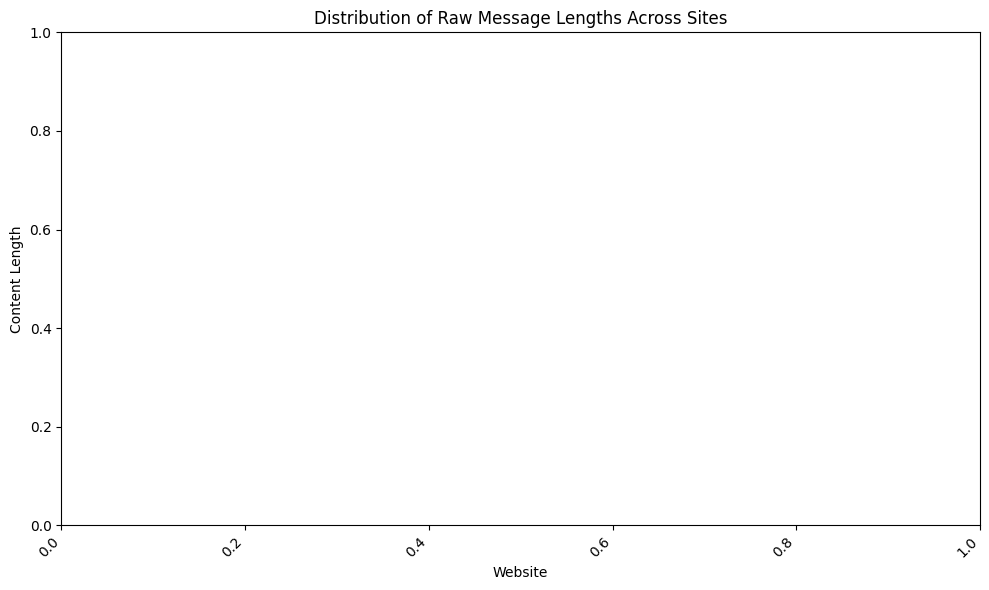

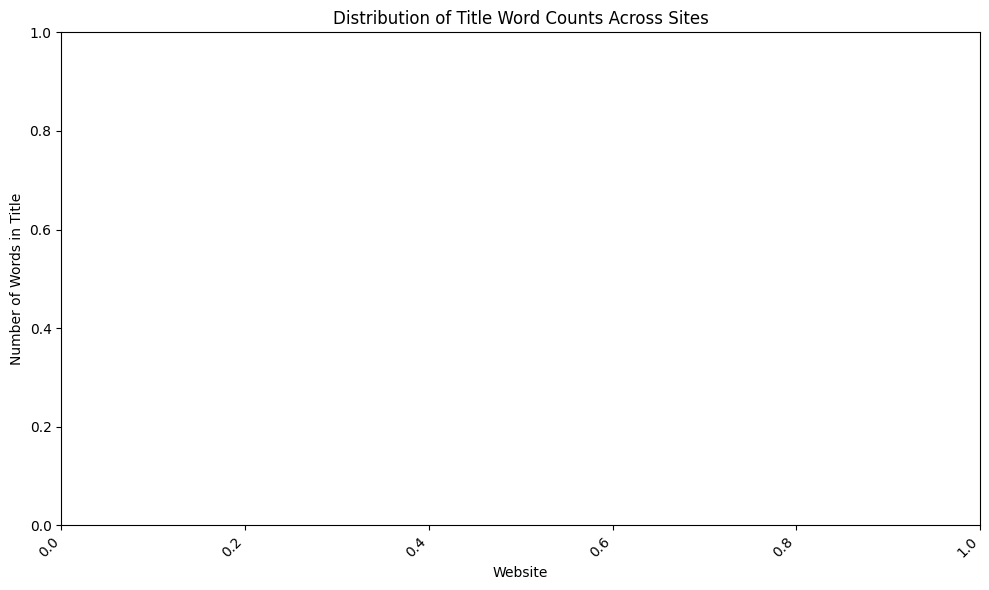

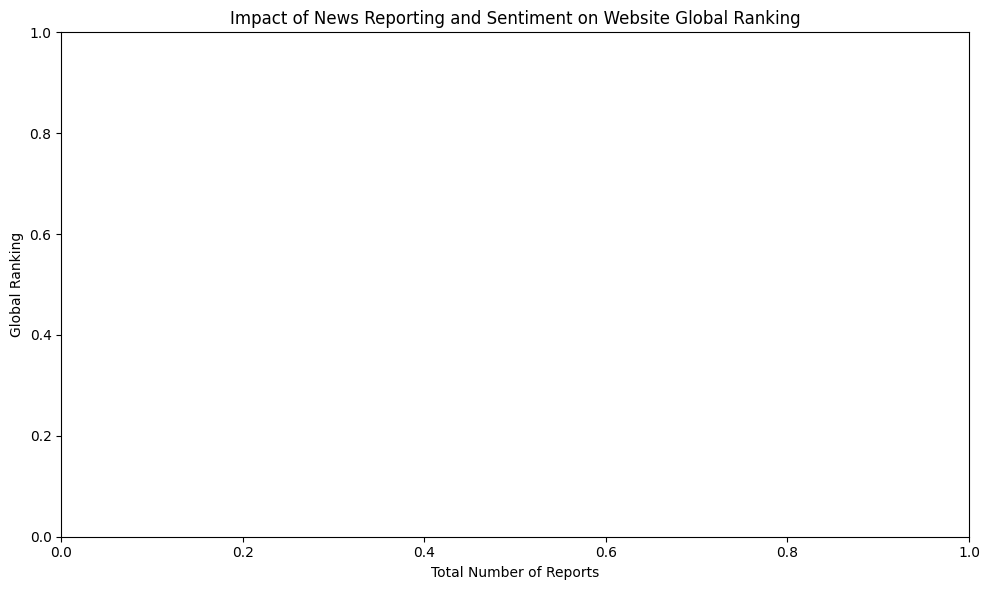

In [124]:
# Merge the datasets on the common column (website domain)
merged_data = pd.merge(rating_data, domain_data, left_on='source_name', right_on='SourceCommonName', how='inner')
merged_data = pd.merge(merged_data, traffic_data, left_on='source_name', right_on='Domain', how='inner')

# Calculate content length
merged_data['content_length'] = merged_data['content'].str.len()

# Compare raw message lengths (content lengths) across sites
plt.figure(figsize=(10, 6))
sns.boxplot(x='source_name', y='content_length', data=merged_data)
plt.title('Distribution of Raw Message Lengths Across Sites')
plt.xlabel('Website')
plt.ylabel('Content Length')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Compare the number of words in the title across sites
merged_data['title_word_count'] = merged_data['title'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.boxplot(x='source_name', y='title_word_count', data=merged_data)
plt.title('Distribution of Title Word Counts Across Sites')
plt.xlabel('Website')
plt.ylabel('Number of Words in Title')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a 2D scatter plot to analyze the impact of frequent news reporting and sentiment on website's global ranking
plt.figure(figsize=(10, 6))
sns.scatterplot(x='article_id', y='GlobalRank', hue='title_sentiment', data=merged_data)
plt.title('Impact of News Reporting and Sentiment on Website Global Ranking')
plt.xlabel('Total Number of Reports')
plt.ylabel('Global Ranking')
plt.tight_layout()
plt.show()


In [1]:
rating_data.columns

NameError: name 'rating_data' is not defined